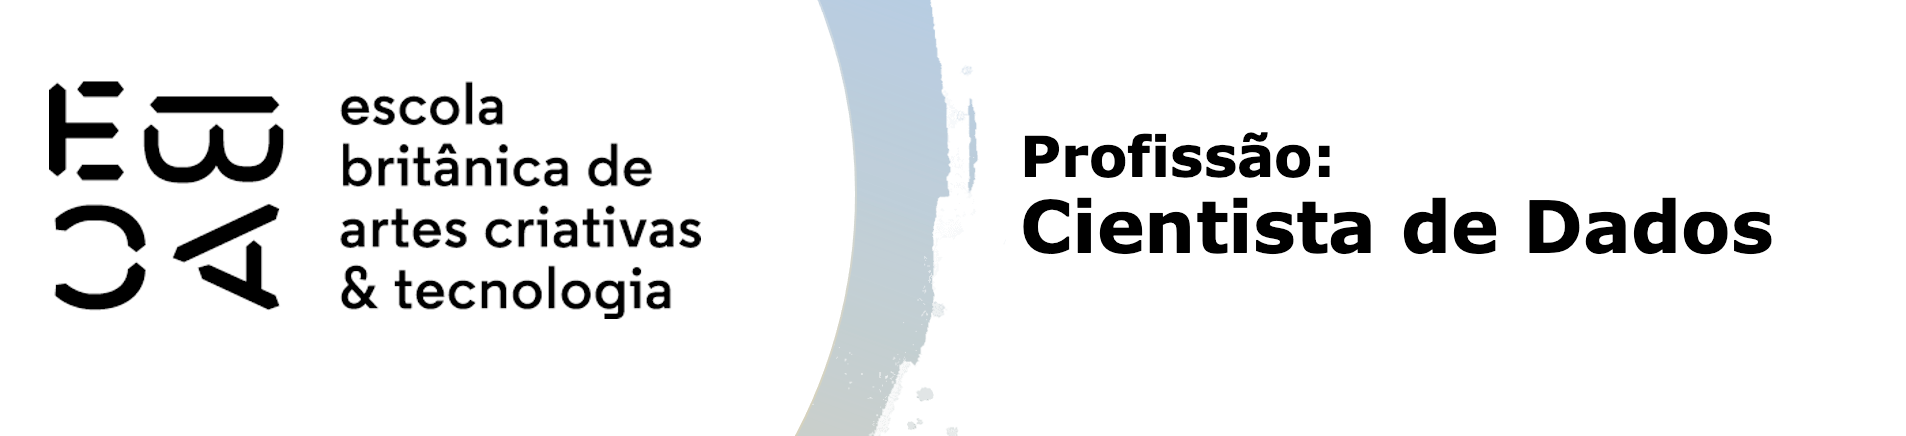

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

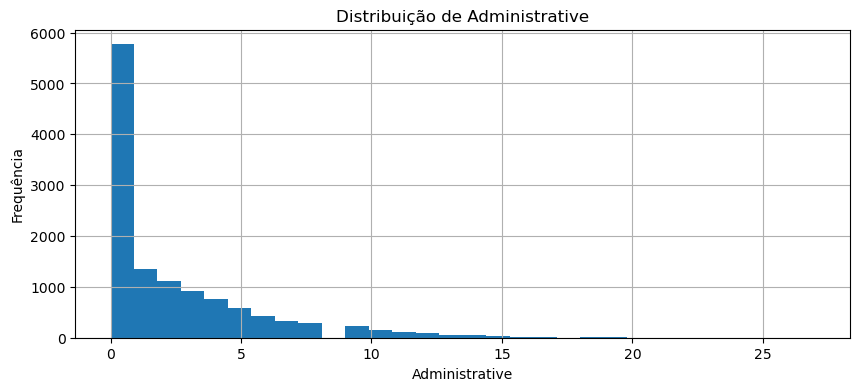

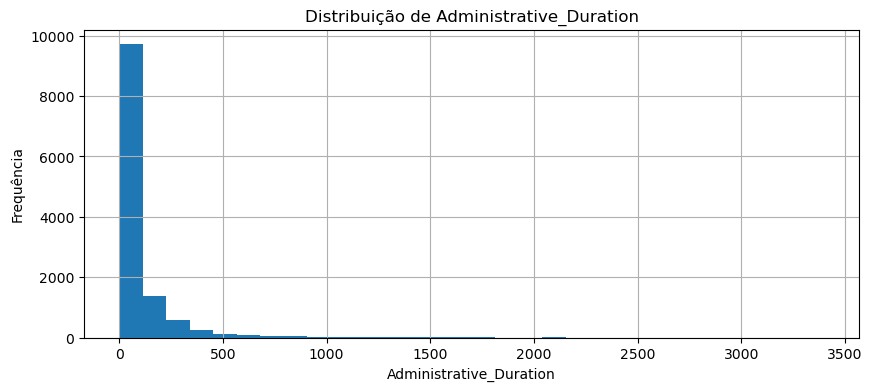

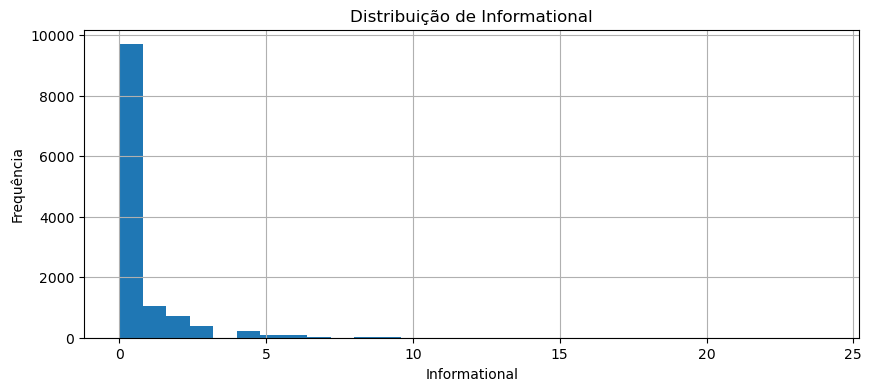

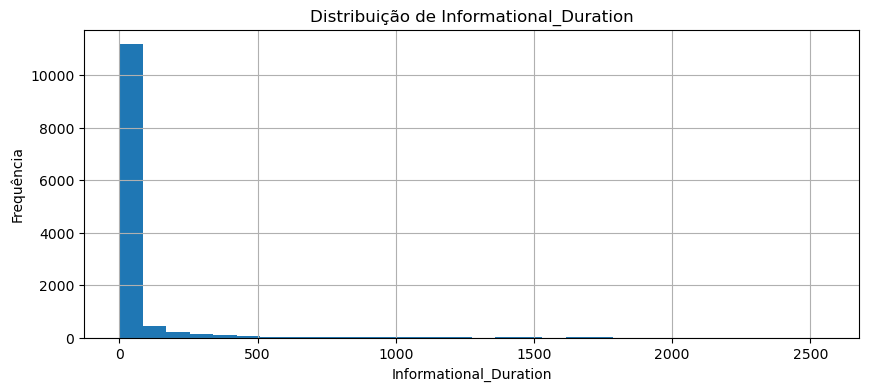

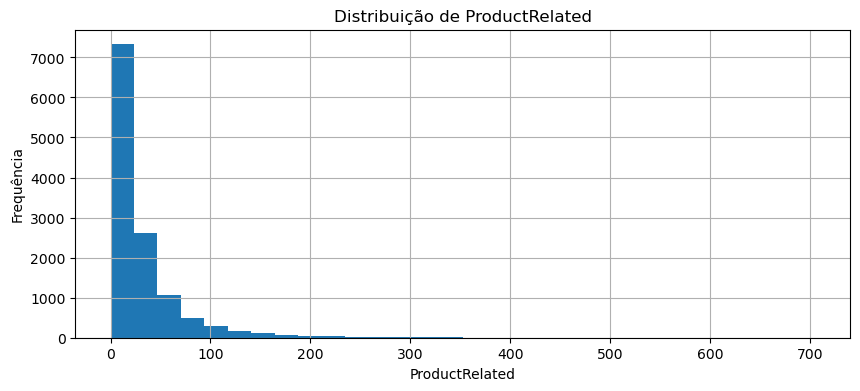

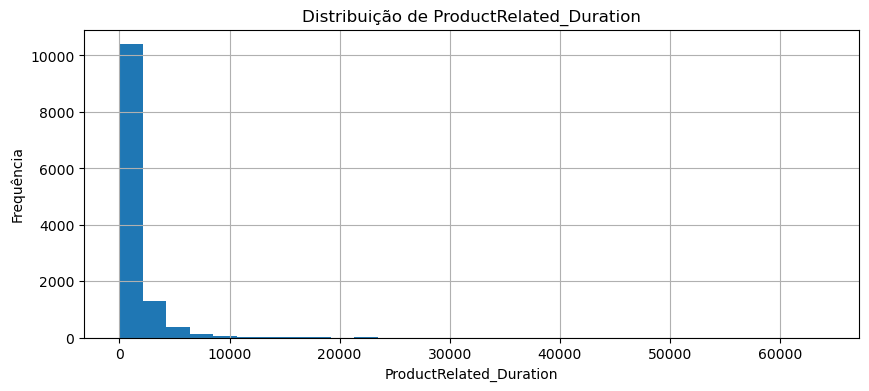

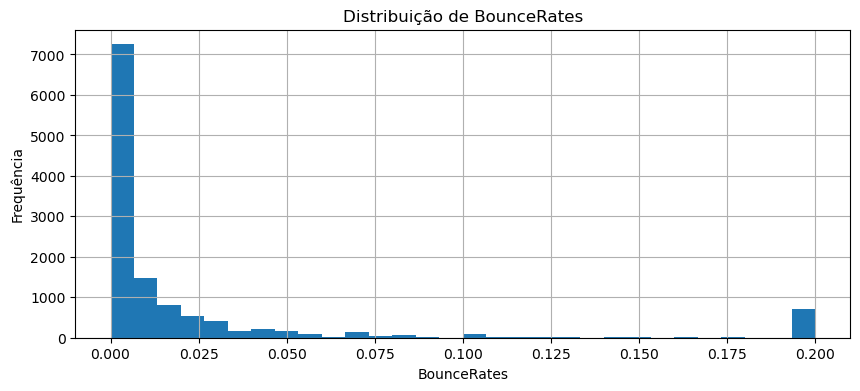

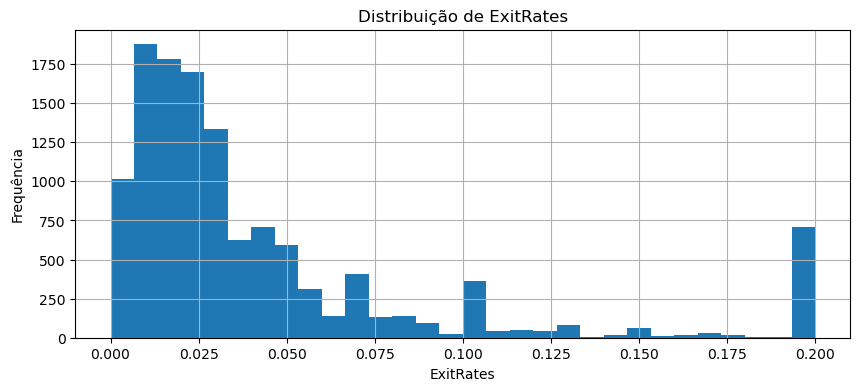

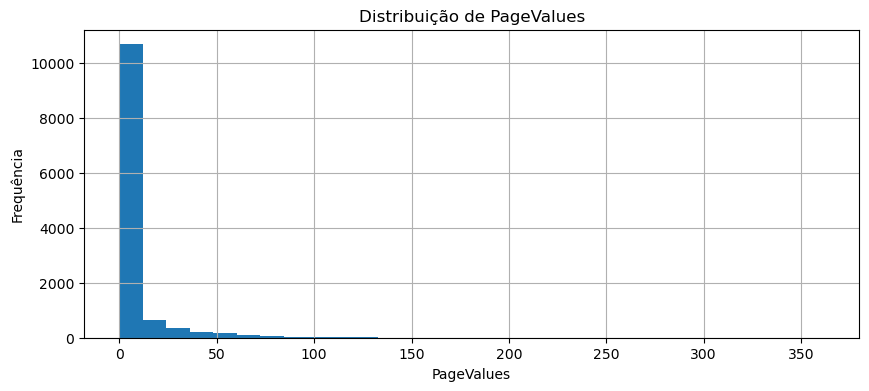

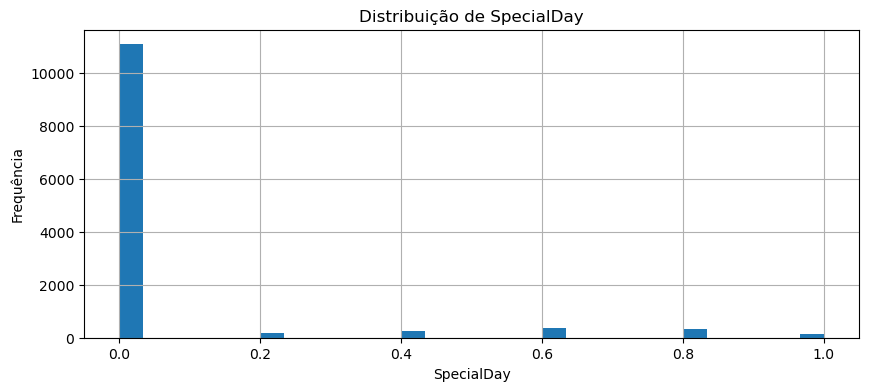

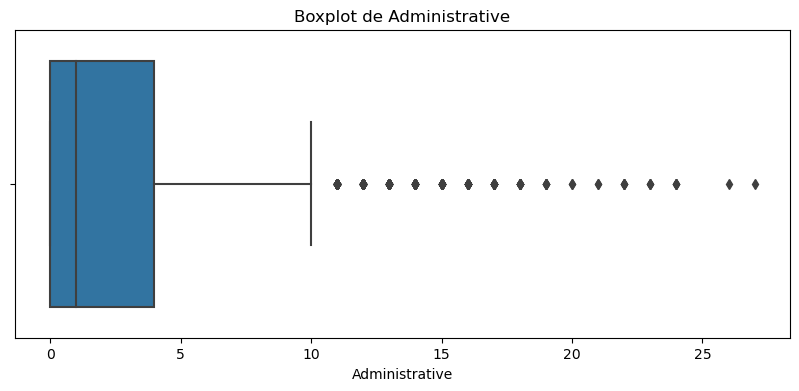

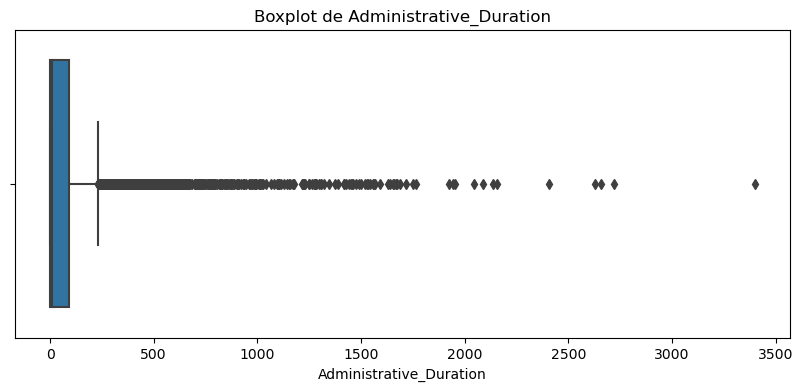

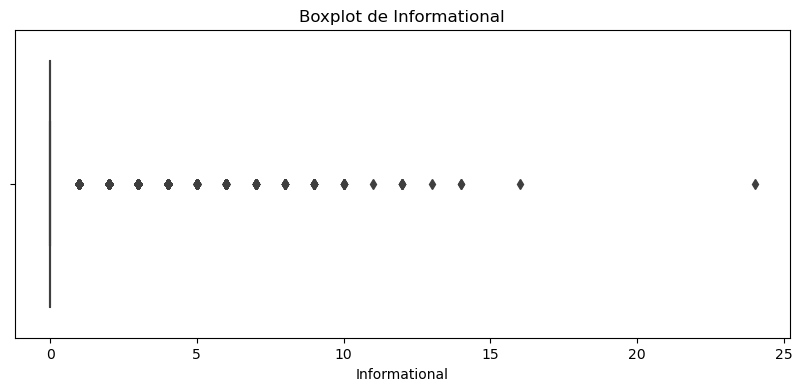

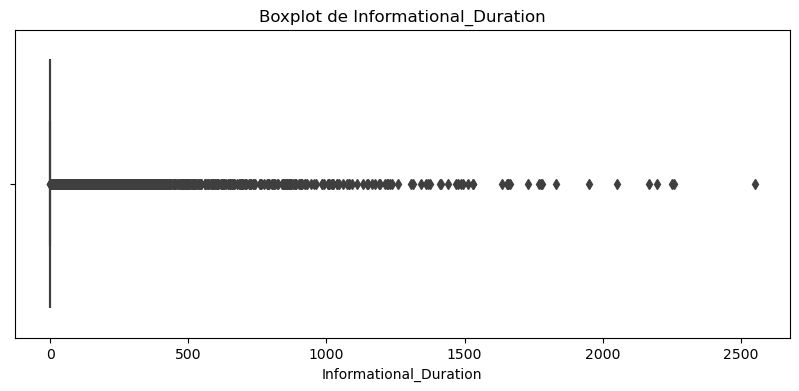

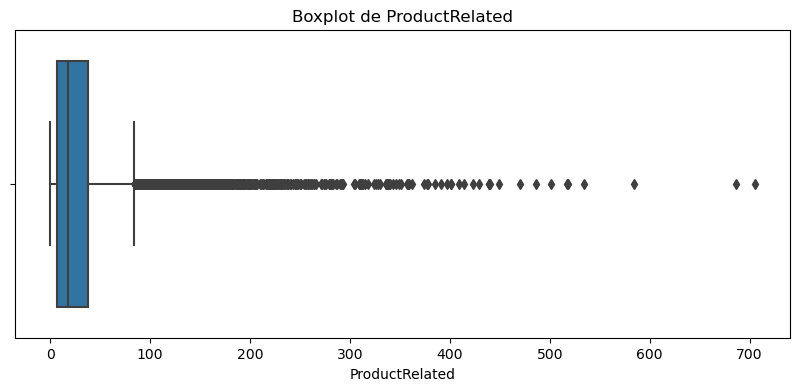

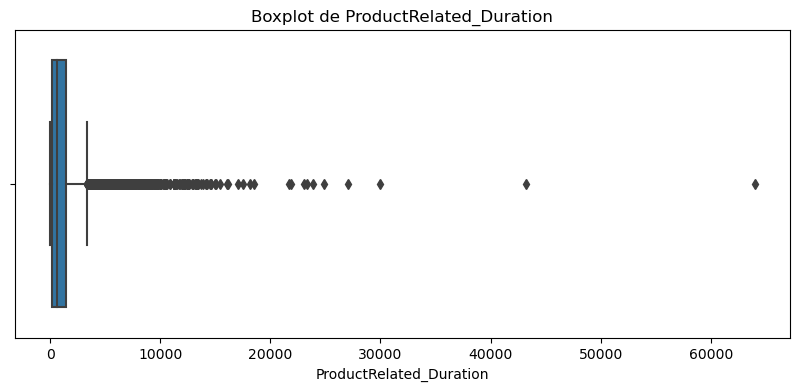

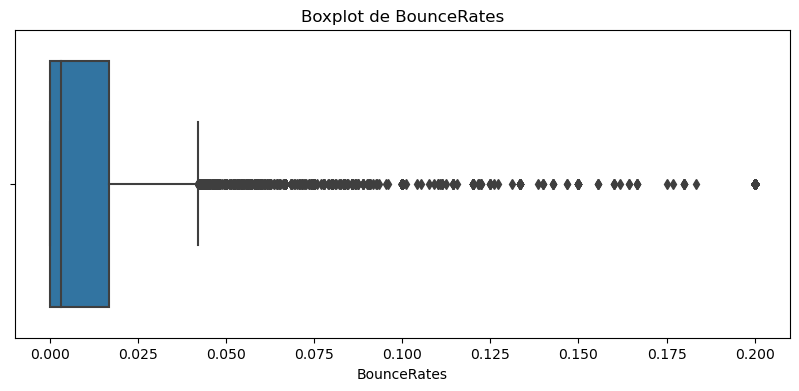

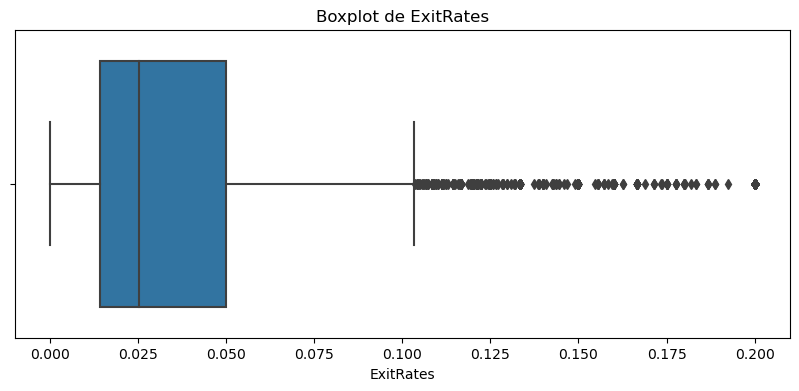

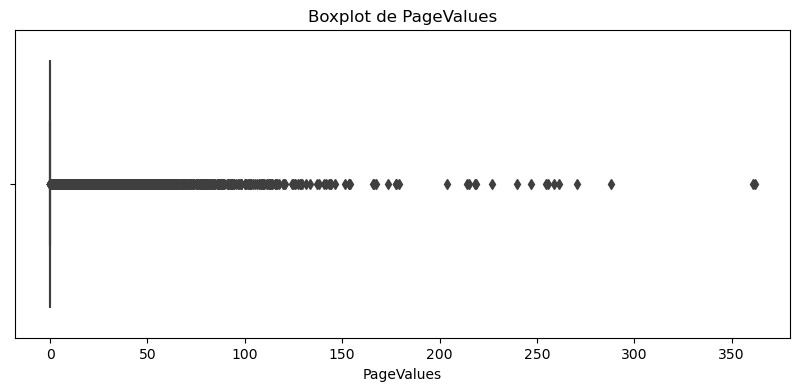

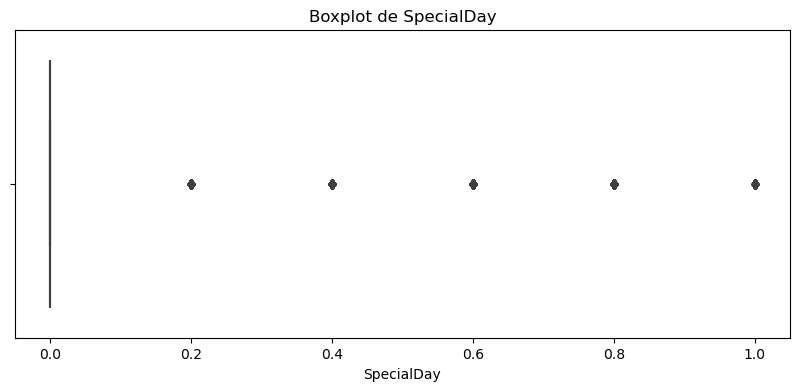

In [4]:
# Estatísticas básicas das variáveis numéricas
print(df.describe())

# Histograma para variáveis numéricas
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
for var in num_vars:
    plt.figure(figsize=(10, 4))
    df[var].hist(bins=30)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

# Boxplot para identificar outliers
for var in num_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()



Frequência de Month
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Frequência de OperatingSystems
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

Frequência de Browser
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Frequência de Region
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

Frequência de TrafficType
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

Frequência de VisitorType
Visit

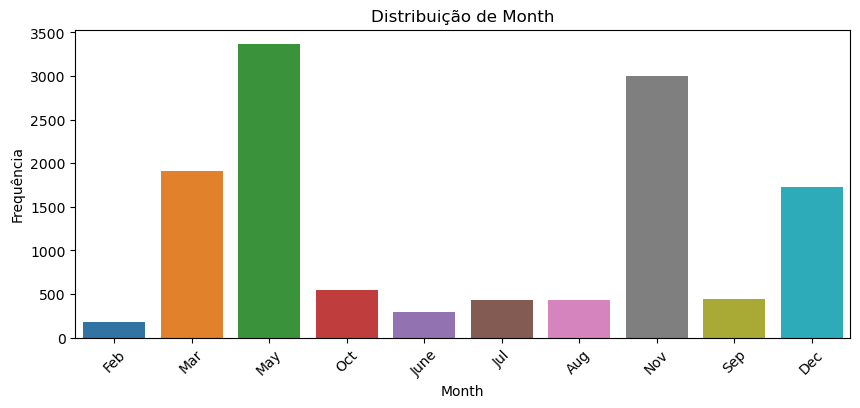

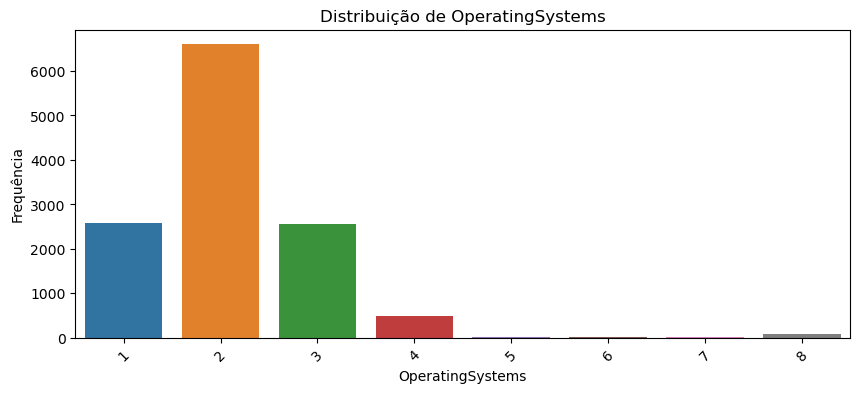

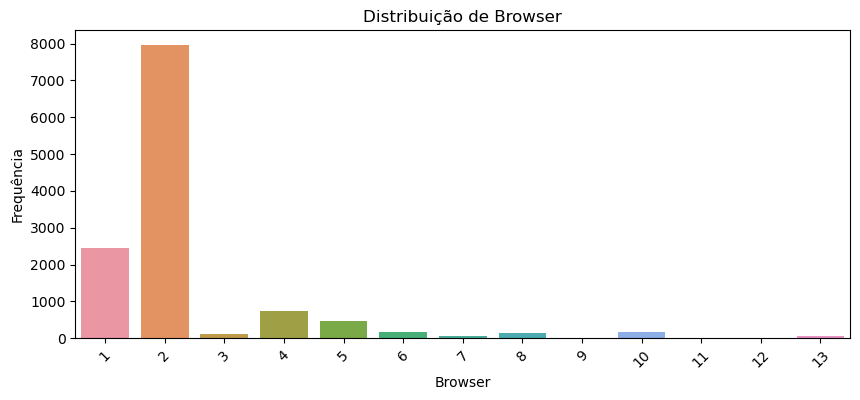

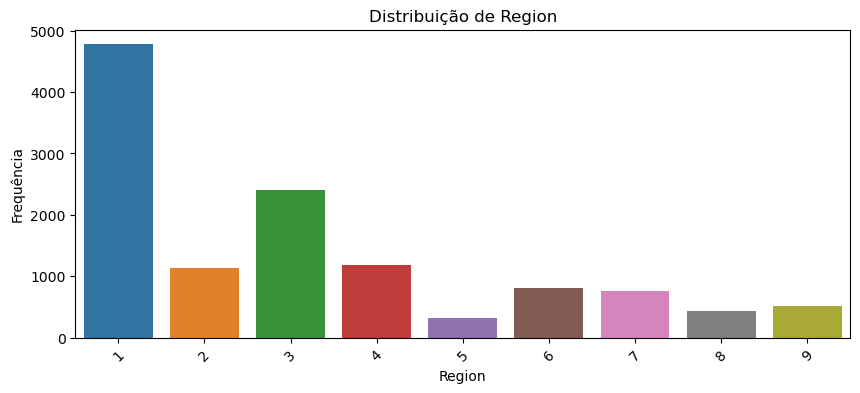

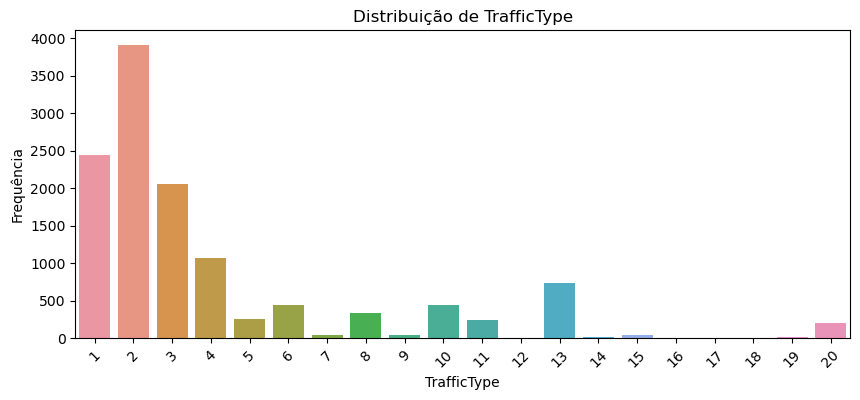

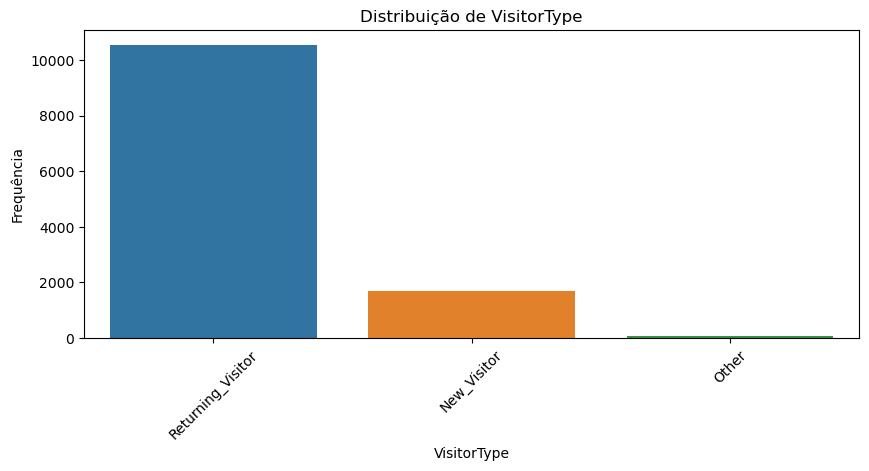

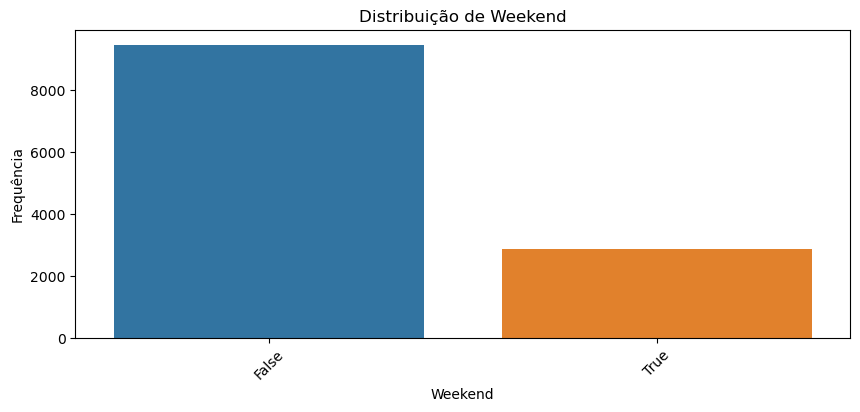

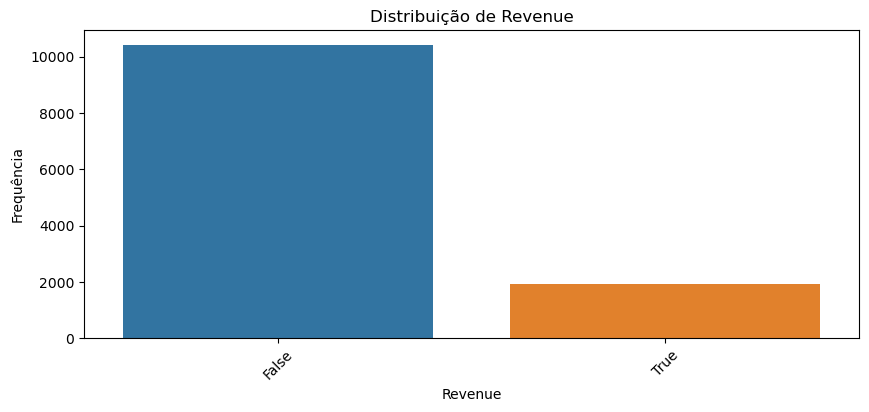

In [5]:
# Frequência das categorias para variáveis categóricas
categorical_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for var in categorical_vars:
    print(f'\nFrequência de {var}')
    print(df[var].value_counts())

# Gráfico de barras para variáveis categóricas
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.show()


In [6]:
# Contagem de valores missing por coluna
print(df.isnull().sum())

# Proporção de valores missing por coluna
print(df.isnull().mean())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Padronização das variáveis numéricas
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# Normalização das variáveis numéricas (opcional, se necessário)
min_max_scaler = MinMaxScaler()
df[num_vars] = min_max_scaler.fit_transform(df[num_vars])


In [8]:
# Codificação one-hot das variáveis categóricas
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


In [9]:
# Detecção de outliers usando IQR
for var in num_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo limites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrando outliers
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

# Criação de variáveis derivadas (exemplo)
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']


## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

# Tratamento de valores faltantes
df['PageValues'].fillna(df['PageValues'].mean(), inplace=True)  # Imputação com a média para variáveis numéricas

# Codificação de variáveis categóricas
categorical_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Normalização de variáveis numéricas
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = StandardScaler()
df_encoded[num_vars] = scaler.fit_transform(df_encoded[num_vars])

# Verificar se há valores faltantes após codificação e normalização
print(df_encoded.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
                          ..
Month_Mar                  0
Month_May                  0
Month_Nov                  0
Month_Oct                  0
Month_Sep                  0
Length: 69, dtype: int64


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

# Imputação de valores faltantes
df['PageValues'].fillna(df['PageValues'].mean(), inplace=True)

# Definir variáveis numéricas e categóricas
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

# Pré-processamento de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ]
)

# Aplicar pré-processamento
X = preprocessor.fit_transform(df)


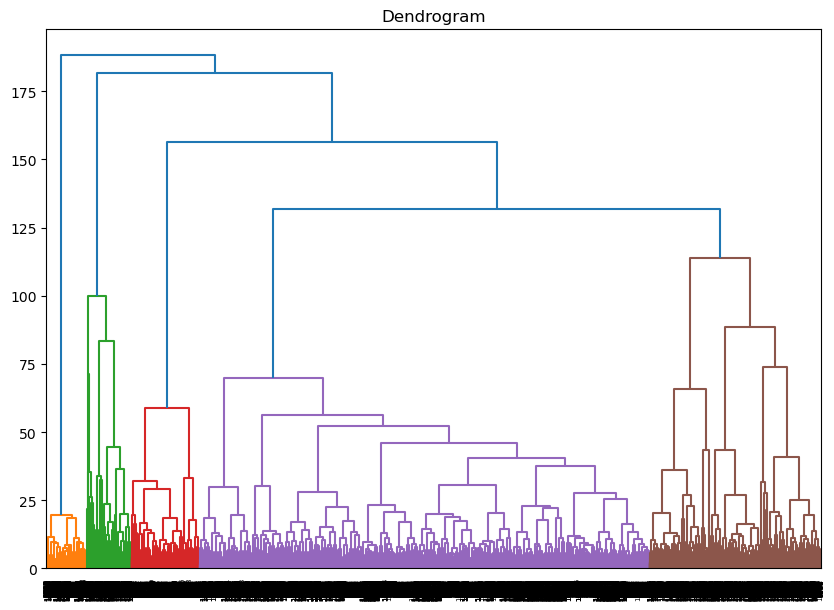

C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Agrupamento Hierárquico com 3 Grupos


TypeError: Could not convert FebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebFebMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMarMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayOctNovJuneJuneJulJulJuneJuneJulNovAugSepSepAugAugJulJuneJuneNovSepNovNovOctJuneAugOctJuneJuneJulJulJuneJulOctAugJuneAugJulOctSepJulJuneAugJuneAugOctJulSepJuneJulJuneJulOctAugOctJulJulJulJuneAugAugJulJulAugJuneJuneNovAugJuneNovNovJuneJuneJuneSepJuneSepJulJuneAugJuneJuneJulJuneJulJulDecNovDecNovNovNovDecDecDecDecNovNovNovDecNovNovNovNovDecDecNovNovNovDecNovDecDecNovDecNovNovDecNovDecNovNovNovDecDecNovDecNovNovNovNovDecNovNovDecNovNovDecNovDecNovDecNovNovDecNovNovNovNovDecNovNovNovNovNovDecDecNovNovNovNovNovDecDecNovNovDecNovDecDecDecDecNovNovDecDecDecDecNovNovDecNovDecDecNovNovDecNovNovNovDecNovNovDecDecDecDecDecNovNovDecDecNovDecNovDecNovNovNovNovNovDecNovDecDecNovNovNovDecNovDecNovDecNovNovDecDecNovDecDecNovNovNovNovNovDecNovNovNovNovNovDecDecDecNovNovDecNovNovDecNovDecNovNovDecNovNovNovDecNovDecNovDecNovDecNovNovNovNovNovDecNovNovNovNovDecDecNovDecNovNovDecNovDecNovDecNovNovNovDecNovDecDecNovNovDecNovNovDecDecNovNovNovNovNovDecDecNovDecNovNovNovDecDecNovNovDecDecNovDecNovNovNovNovDecDecDecDecDecNovDecNovNovNov to numeric

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

# Imputação de valores faltantes
df['PageValues'].fillna(df['PageValues'].mean(), inplace=True)

# Definir variáveis numéricas e categóricas
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

# Pré-processamento de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ]
)

# Aplicar pré-processamento
X = preprocessor.fit_transform(df)

# Converter matriz esparsa para densa se necessário
if isinstance(X, np.ndarray) and X.dtype == np.float64:
    pass
else:
    X = X.toarray()

# Agrupamento Hierárquico
def plot_dendrogram(model, **kwargs):
    """Plot a dendrogram for hierarchical clustering."""
    plt.figure(figsize=(10, 7))
    plt.title('Dendrogram')
    dendrogram(model, **kwargs)
    plt.show()

# Calcular a matriz de linkage
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Plotar dendrograma
plot_dendrogram(linkage_matrix)

# Obter agrupamentos hierárquicos para 3 e 4 grupos
df['cluster_hierarchical_3'] = fcluster(linkage_matrix, 3, criterion='maxclust')
df['cluster_hierarchical_4'] = fcluster(linkage_matrix, 4, criterion='maxclust')

# K-means Clustering
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(X)

df['cluster_kmeans_3'] = kmeans_3.labels_
df['cluster_kmeans_4'] = kmeans_4.labels_

# Análise descritiva dos grupos formados por agrupamento hierárquico
print("Agrupamento Hierárquico com 3 Grupos")
print(df.groupby('cluster_hierarchical_3').mean())

print("\nAgrupamento Hierárquico com 4 Grupos")
print(df.groupby('cluster_hierarchical_4').mean())

# Análise descritiva dos grupos formados por k-means
print("\nK-means com 3 Grupos")
print(df.groupby('cluster_kmeans_3').mean())

print("\nK-means com 4 Grupos")
print(df.groupby('cluster_kmeans_4').mean())


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [14]:
import pandas as pd

# Carregar dados
df = pd.read_csv('online_shoppers_intention.csv')

# Imputação de valores faltantes
df['PageValues'].fillna(df['PageValues'].mean(), inplace=True)

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_vars = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(drop='first'), cat_vars)
    ]
)

X = preprocessor.fit_transform(df)

# Converter matriz esparsa para densa se necessário
if isinstance(X, np.ndarray) and X.dtype == np.float64:
    pass
else:
    X = X.toarray()

# Agrupamento Hierárquico
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(X, method='ward', metric='euclidean')

df['cluster_hierarchical_3'] = fcluster(linkage_matrix, 3, criterion='maxclust')
df['cluster_hierarchical_4'] = fcluster(linkage_matrix, 4, criterion='maxclust')

# K-means Clustering
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(X)

df['cluster_kmeans_3'] = kmeans_3.labels_
df['cluster_kmeans_4'] = kmeans_4.labels_

# Avaliação dos grupos obtidos
def evaluate_clusters(df, cluster_column):
    """Avalia os clusters em relação a BounceRates e Revenue."""
    result = df.groupby(cluster_column).agg({
        'BounceRates': 'mean',
        'Revenue': 'mean'
    })
    result['Revenue'] = result['Revenue'].astype(int)  # Convert revenue to binary if not already
    result['Revenue'] = result['Revenue'].map({0: 'No', 1: 'Yes'})  # Map revenue to 'Yes' or 'No'
    return result

# Avaliar clusters hierárquicos
print("Avaliação dos Grupos Hierárquicos com 3 Grupos")
print(evaluate_clusters(df, 'cluster_hierarchical_3'))

print("\nAvaliação dos Grupos Hierárquicos com 4 Grupos")
print(evaluate_clusters(df, 'cluster_hierarchical_4'))

# Avaliar clusters k-means
print("\nAvaliação dos Grupos K-means com 3 Grupos")
print(evaluate_clusters(df, 'cluster_kmeans_3'))

print("\nAvaliação dos Grupos K-means com 4 Grupos")
print(evaluate_clusters(df, 'cluster_kmeans_4'))


C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrador\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Avaliação dos Grupos Hierárquicos com 3 Grupos
                        BounceRates Revenue
cluster_hierarchical_3                     
1                          0.198949      No
2                          0.006774      No
3                          0.012644      No

Avaliação dos Grupos Hierárquicos com 4 Grupos
                        BounceRates Revenue
cluster_hierarchical_4                     
1                          0.198949      No
2                          0.006774      No
3                          0.034811      No
4                          0.010214      No

Avaliação dos Grupos K-means com 3 Grupos
                  BounceRates Revenue
cluster_kmeans_3                     
0                    0.006276      No
1                    0.166047      No
2                    0.009147      No

Avaliação dos Grupos K-means com 4 Grupos
                  BounceRates Revenue
cluster_kmeans_4                     
0                    0.173476      No
1                    0.008562  